In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression

# ----- CONCEPTOS TEÓRICOS 

## =============================================================
## 1. BIAS-VARIANCE TRADE-OFF (SESGO-VARIANZA)
## =============================================================
"""
Explicación:
- Alto Bias: Modelo demasiado simple -> Subajuste (Underfitting)
- Alta Varianza: Modelo demasiado complejo -> Sobreajuste (Overfitting)
- El objetivo es encontrar el equilibrio óptimo
"""


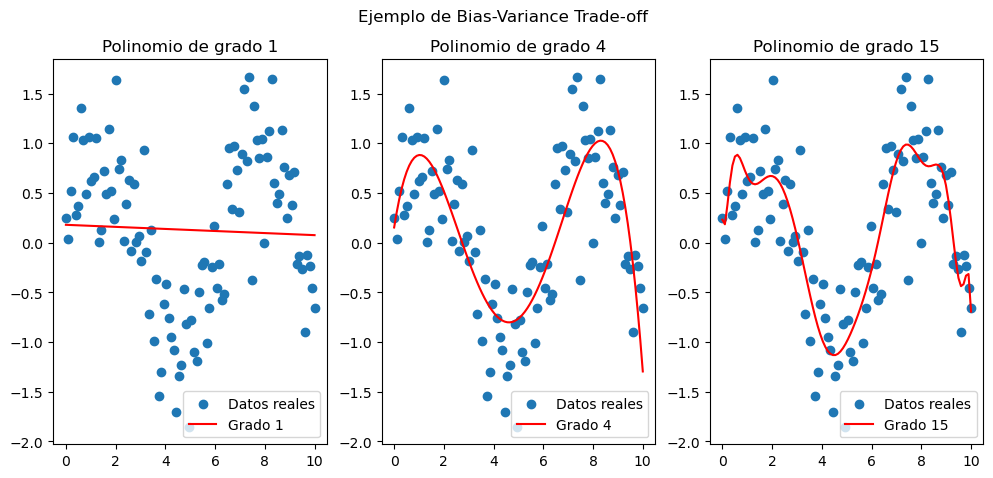

In [3]:
np.random.seed(42)
X = np.linspace(0, 10, 100)
y_true = np.sin(X) + np.random.normal(scale=0.5, size=X.shape)

# Modelos con diferente complejidad
poly_degrees = [1, 4, 15]
plt.figure(figsize=(12, 5))

for i, d in enumerate(poly_degrees, 1):
    coefs = np.polyfit(X, y_true, d)
    y_pred = np.polyval(coefs, X)
    plt.subplot(1, 3, i)
    plt.scatter(X, y_true, label="Datos reales")
    plt.plot(X, y_pred, color='red', label=f'Grado {d}')
    plt.title(f'Polinomio de grado {d}')
    plt.legend()

plt.suptitle("Ejemplo de Bias-Variance Trade-off")
plt.show()

# =============================================================
# 2. PARÁMETROS vs. HIPERPARÁMETROS
# =============================================================

- Parámetros: Se aprenden del entrenamiento (ej. coeficientes en regresión)
- Hiperparámetros: Configuraciones ajustadas antes del entrenamiento (ej. profundidad máxima)


In [4]:
# Ejemplo: Hiperparámetro en Árbol de Decisión
X, y = np.random.rand(200, 2), np.random.choice([0, 1], size=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for depth in [1, 5, 10]:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    print(f"Profundidad {depth} - Accuracy: {accuracy_score(y_test, model.predict(X_test)):.3f}")

Profundidad 1 - Accuracy: 0.483
Profundidad 5 - Accuracy: 0.433
Profundidad 10 - Accuracy: 0.383


# =============================================================
# 3. SOBREAJUSTE VS. SUBAJUSTE
# =============================================================

Explicación sencilla:
- **Sobreajuste (Overfitting)**: Ocurre cuando el modelo aprende demasiado bien los detalles y el ruido del conjunto de entrenamiento, pero no puede generalizar bien a datos nuevos.
- **Subajuste (Underfitting)**: Ocurre cuando el modelo es demasiado simple y no logra capturar los patrones reales de los datos, lo que lo hace ineficaz en entrenamiento y prueba.

Ejemplo:
- Un modelo con demasiados parámetros memoriza los datos pero falla en test (sobreajuste).
- Un modelo con pocos parámetros no capta la relación real entre variables (subajuste).


# =============================================================
# 4. MÉTRICAS DE EVALUACIÓN
# =============================================================

- **Métricas en regresión:**
  - **Error Absoluto Medio (MAE)**: Promedio de los valores absolutos de los errores.
  - **Error Cuadrático Medio (MSE)**: Promedio de los errores al cuadrado.
  - **Raíz del Error Cuadrático Medio (RMSE)**: Raíz cuadrada del MSE.
  - **Coeficiente de determinación (R²)**: Indica qué proporción de la variabilidad de la variable objetivo es explicada por el modelo.

- **Métricas en clasificación:**
  - **Exactitud (Accuracy)**: Proporción de predicciones correctas.
  - **Precisión (Precision)**: Proporción de verdaderos positivos sobre todas las predicciones positivas.
  - **Recall (Sensibilidad)**: Proporción de verdaderos positivos sobre los casos reales positivos.
  - **F1-Score**: Media armónica entre precisión y recall.
  - **Matriz de Confusión**: Tabla que muestra la relación entre predicciones y valores reales.
  - etc...
"""

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import sklearn
import os

In [7]:
os.getcwd()

'/Users/joseperez/Documents/GitHub/python-statlearning-lab/week_4'

In [12]:
path = "./data/Churn_Modelling.csv"
churn_df = pd.read_csv(path)
churn_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# =============================================================
# 1. PROBLEMA DE CLASIFICACIÓN: PREDICCIÓN DE DESERCIÓN DE CLIENTES BANCARIOS
# =============================================================
"""
### **Descripción del Problema**
El objetivo de este problema de clasificación es desarrollar un modelo predictivo que, basado en los atributos de los clientes y su puntaje de crédito, pueda determinar si un cliente abandonará el banco en el futuro.

### **Sobre los Datos**
- Los datos provienen de Kaggle y pueden descargarse desde [este enlace](https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction).
- La variable objetivo en el dataset es `Exited`, y el modelo debe predecir si su valor será 1 (cliente que abandona) o 0 (cliente que permanece).

### **Algoritmos a Utilizar**
Dado que se trata de un problema de clasificación binaria, se emplearán los siguientes algoritmos de aprendizaje supervisado:
- **Regresión Logística**
- **Árboles de Decisión**

### **Métricas de Evaluación**
Para evaluar el rendimiento de los modelos, se utilizarán las siguientes métricas:
- **Exactitud (Accuracy Score)**: Proporción de predicciones correctas sobre el total de observaciones.
- **Precisión (Precision)**: Indica cuántas de las predicciones positivas fueron realmente positivas.
- **Recall (Sensibilidad o Tasa de Verdaderos Positivos)**: Evalúa cuántos casos positivos reales fueron correctamente identificados.
- **F1-Score**: Media armónica entre precisión y recall, útil en casos de datos desbalanceados.
- **Log Loss**: Evalúa la incertidumbre en las probabilidades de clasificación.
"""

In [14]:
# Definimos las características redundantes
redundant_features = ["RowNumber", "CustomerId", "Surname"]

# Eliminamos estas columnas del DataFrame
churn_df_final = churn_df.drop(redundant_features, axis=1)

# Mostramos la primera fila del nuevo DataFrame
churn_df_final.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [15]:
# Definir el diccionario de reemplazo
gender_dict = {'Male': 1, 'Female': 0}

# Reemplazar los valores en la columna 'Gender'
churn_df_final['Gender'] = churn_df_final['Gender'].replace(gender_dict)

In [16]:
# Aplicar One-Hot Encoding a la columna 'Geography'
final_df_encoded = pd.get_dummies(churn_df_final, columns=['Geography'])

In [17]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = final_df_encoded.drop(['Exited'], axis=1)  # Eliminamos la variable objetivo del dataset
y = final_df_encoded['Exited']  # Variable objetivo

# Dividir los datos en 80% entrenamiento y 20% prueba
train_data, test_data, train_labels, test_labels = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Mostrar la cantidad de datos en cada conjunto
print(f"Total de registros: {len(final_df_encoded)}\n")
print(f"Cantidad de datos de entrenamiento: {len(train_data)}\n")
print(f"Cantidad de datos de prueba: {len(test_data)}\n")
print(f"Cantidad de etiquetas de entrenamiento: {len(train_labels)}\n")
print(f"Cantidad de etiquetas de prueba: {len(test_labels)}\n")

# Verificación: asegurarnos de que el número de filas coincide
assert len(train_data) == len(train_labels)
assert len(test_data) == len(test_labels)

Total de registros: 10000

Cantidad de datos de entrenamiento: 8000

Cantidad de datos de prueba: 2000

Cantidad de etiquetas de entrenamiento: 8000

Cantidad de etiquetas de prueba: 2000



In [18]:
# Importar los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Crear diccionario con los modelos a entrenar
model_instances = {
    'logistic_regressor': LogisticRegression(),  # Regresión Logística
    'knn': KNeighborsClassifier()  # K-Nearest Neighbors (KNN)
}

# Entrenar cada modelo en el conjunto de entrenamiento
for model_name, model in model_instances.items():
    model.fit(train_data, train_labels)  # Ajustar el modelo con los datos de entrenamiento
    model_instances[model_name] = model  # Guardar el modelo entrenado

In [24]:
def calculate_metrics(conf_matrix):
    """
    Función para calcular métricas de TP, TN, FP, FN a partir de la matriz de confusión.

    Parámetro:
    - conf_matrix: Matriz de confusión generada por confusion_matrix()

    Retorna:
    - Diccionario con valores de TP, TN, FP, FN
    """
    TP = conf_matrix[1, 1]  # Verdaderos Positivos (Churn predicho correctamente)
    TN = conf_matrix[0, 0]  # Verdaderos Negativos (No Churn predicho correctamente)
    FP = conf_matrix[0, 1]  # Falsos Positivos (No Churn mal predicho como Churn)
    FN = conf_matrix[1, 0]  # Falsos Negativos (Churn mal predicho como No Churn)

    return {"TP": TP, "TN": TN, "FP": FP, "FN": FN}

# Obtener métricas de cada modelo
metrics_log = calculate_metrics(conf_mat_log)
metrics_knn = calculate_metrics(conf_mat_knn)

print("Métricas de Regresión Logística:", metrics_log)
print("Métricas de KNN:", metrics_knn)

Métricas de Regresión Logística: {'TP': 28, 'TN': 1573, 'FP': 34, 'FN': 365}
Métricas de KNN: {'TP': 37, 'TN': 1491, 'FP': 116, 'FN': 356}


In [25]:
from sklearn.metrics import classification_report

def evaluate_model(model, test_data, test_labels, model_name):
    """
    Función para evaluar un modelo y mostrar el reporte de clasificación.

    Parámetros:
    - model: Modelo entrenado
    - test_data: Datos de prueba
    - test_labels: Etiquetas reales
    - model_name: Nombre del modelo para mostrar en la evaluación
    """
    y_pred = model.predict(test_data)
    
    print(f"Reporte de Clasificación - {model_name}:\n")
    print(classification_report(test_labels, y_pred, target_names=["No Churn", "Churn"]))
    print("-" * 50)

# Evaluar Regresión Logística
evaluate_model(model_instances['logistic_regressor'], test_data, test_labels, "Regresión Logística")

# Evaluar K-Nearest Neighbors (KNN)
evaluate_model(model_instances['knn'], test_data, test_labels, "K-Nearest Neighbors")

Reporte de Clasificación - Regresión Logística:

              precision    recall  f1-score   support

    No Churn       0.81      0.98      0.89      1607
       Churn       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

--------------------------------------------------
Reporte de Clasificación - K-Nearest Neighbors:

              precision    recall  f1-score   support

    No Churn       0.81      0.93      0.86      1607
       Churn       0.24      0.09      0.14       393

    accuracy                           0.76      2000
   macro avg       0.52      0.51      0.50      2000
weighted avg       0.70      0.76      0.72      2000

--------------------------------------------------


# 📌 1️⃣ Métricas de Evaluación

Para evaluar el rendimiento de un modelo de clasificación, utilizamos varias métricas que nos permiten entender qué tan bien está prediciendo las clases correctas.

A continuación, explicamos cada métrica con su **fórmula matemática** y su **interpretación práctica**.

---

## ✅ 2️⃣ Exactitud (Accuracy Score)

### 📖 Definición
La **exactitud** mide la **proporción de predicciones correctas** sobre el total de observaciones.

### 📌 Fórmula Matemática
\[
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
\]

### 📊 Interpretación
- Indica **qué porcentaje del total de casos fueron correctamente clasificados**.
- Puede ser **engañosa en datasets desbalanceados**, ya que **un modelo puede obtener alta Accuracy simplemente prediciendo siempre la clase mayoritaria**.

---

## ✅ 3️⃣ Precisión (Precision)
### 📖 Definición
La **precisión** mide qué porcentaje de las predicciones positivas fueron realmente correctas.

### 📌 Fórmula Matemática
\[
\text{Precision} = \frac{TP}{TP + FP}
\]

### 📊 Interpretación
- Nos dice qué tan **confiable** es el modelo al predecir la clase positiva.
- **Útil cuando los falsos positivos (FP) son costosos** (ejemplo: diagnóstico de cáncer, donde un FP significaría un diagnóstico erróneo de la enfermedad).

### 🏆 **Ejemplo en Churn**
- **Alta Precisión** → Cuando el modelo dice que un cliente va a abandonar, realmente lo hace.
- **Baja Precisión** → El modelo predice que un cliente abandonará, pero en realidad se queda (FP alto).

---

## ✅ 4️⃣ Recall (Sensibilidad o Tasa de Verdaderos Positivos)
### 📖 Definición
El **recall** mide cuántos de los casos positivos reales fueron correctamente identificados por el modelo.

### 📌 Fórmula Matemática
\[
\text{Recall} = \frac{TP}{TP + FN}
\]

### 📊 Interpretación
- Evalúa la **capacidad del modelo para detectar correctamente los casos positivos**.
- **Útil cuando los falsos negativos (FN) son costosos** (ejemplo: detectar fraudes bancarios o fallos en un sistema de seguridad).

### 🏆 **Ejemplo en Churn**
- **Alto Recall** → Si un cliente realmente va a abandonar, el modelo lo detecta correctamente.
- **Bajo Recall** → Muchos clientes que realmente abandonan **no son detectados** por el modelo (FN alto).

---

## ✅ 5️⃣ F1-Score
### 📖 Definición
El **F1-score** es la **media armónica entre precisión y recall**. Se usa cuando **hay un desbalance de clases** y queremos encontrar un equilibrio entre **precisión y recall**.

### 📌 Fórmula Matemática
\[
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
\]

### 📊 Interpretación
- **Mejor que Accuracy en datasets desbalanceados**, ya que toma en cuenta tanto FP como FN.
- **Útil cuando queremos minimizar simultáneamente los FP y FN**.

### 🏆 **Ejemplo en Churn**
- **F1-score alto** → Indica que el modelo tiene un **buen balance** entre precisión y recall.
- **F1-score bajo** → Indica que el modelo no está detectando bien los casos positivos o tiene demasiados FP.

---

## ✅ 6️⃣ Log Loss (Logarithmic Loss)
### 📖 Definición
**Log Loss** mide la **incertidumbre** en las probabilidades de clasificación, penalizando predicciones incorrectas con una probabilidad más alta.

### 📌 Fórmula Matemática
\[
\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{p_i}) + (1 - y_i) \log(1 - \hat{p_i}) \right]
\]

Donde:
- \( y_i \) es la etiqueta real (0 o 1).
- \( \hat{p_i} \) es la probabilidad predicha de la clase positiva.
- \( N \) es el número total de observaciones.

### 📊 Interpretación
- **Log Loss bajo** → El modelo asigna probabilidades cercanas a 1 para la clase correcta.
- **Log Loss alto** → El modelo tiene **alta incertidumbre en las predicciones**.

### 🏆 **Ejemplo en Churn**
- Si un cliente realmente abandona y el modelo predice **0.95** de probabilidad de abandono, **Log Loss es bajo**.
- Si el modelo predice **0.50** de probabilidad para un cliente que en realidad abandona, **Log Loss será alto** porque la predicción es incierta.

---

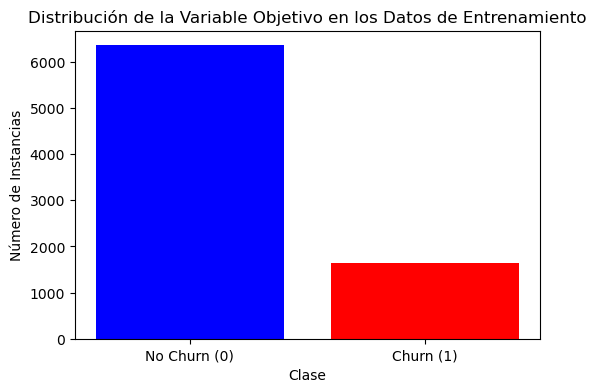

Proporción de No Churn (0): 79.45%
Proporción de Churn (1): 20.55%


In [27]:
# Contar las instancias de cada clase en el conjunto de entrenamiento
class_counts = np.bincount(train_labels)

# Visualizar el desbalance de clases
plt.figure(figsize=(6, 4))
plt.bar(["No Churn (0)", "Churn (1)"], class_counts, color=["blue", "red"])
plt.xlabel("Clase")
plt.ylabel("Número de Instancias")
plt.title("Distribución de la Variable Objetivo en los Datos de Entrenamiento")
plt.show()

# Imprimir proporción de cada clase
total = len(train_labels)
print(f"Proporción de No Churn (0): {class_counts[0] / total:.2%}")
print(f"Proporción de Churn (1): {class_counts[1] / total:.2%}")

# ===============================================================================
# EJEMPLO DE ÁRBOL DE DECISIÓN Y REGRESIÓN LOGÍSTICA
# ===============================================================================
"""
En esta sección, crearemos un dataset simulado donde la variable objetivo (Ama_Emilia_Perez)
depende de la edad de forma NO lineal. Luego compararemos un Árbol de Decisión vs. 
Regresión Logística, evaluándolos con múltiples métricas.
"""

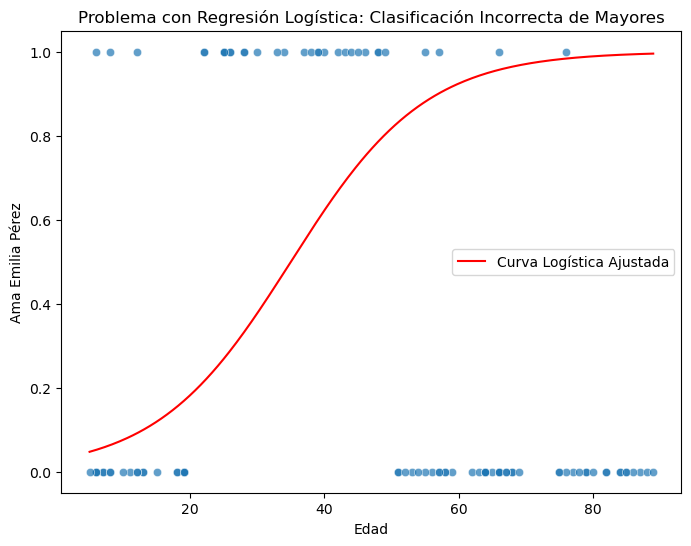

Comparación de Modelos:


Métricas para Árbol de Decisión (Gini):
Precisión: 0.8666666666666667
Matriz de Confusión:
 [[17  1]
 [ 3  9]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.90      0.75      0.82        12

    accuracy                           0.87        30
   macro avg       0.88      0.85      0.86        30
weighted avg       0.87      0.87      0.86        30


Métricas para Árbol de Decisión (Entropía):
Precisión: 0.8666666666666667
Matriz de Confusión:
 [[17  1]
 [ 3  9]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.90      0.75      0.82        12

    accuracy                           0.87        30
   macro avg       0.88      0.85      0.86        30
weighted avg       0.87      0.87      0.86        30


Métricas para Regresión Logística:
Pre

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import sympy as sp
from scipy.special import expit

# ---------------------------------------------------------------------------------
# Introducción
# Implementación de un Árbol de Decisión de Clasificación y comparación con la 
# Regresión Logística, siguiendo las mejores prácticas explicadas en libros de referencia.
# Se ajusta el dataset para reflejar las limitaciones de la regresión logística.
# ---------------------------------------------------------------------------------

# Paso 1: Creación del dataset simulado con limitación para regresión logística
np.random.seed(42)
edades = np.random.randint(5, 90, size=100)
likes_middle = (edades > 20) & (edades < 50)  # Personas de edad media aman Emilia Pérez
likes_old = np.random.choice([0, 1], size=100, p=[0.9, 0.1])  # Mayores tienen menor probabilidad
likes_young = np.random.choice([0, 1], size=100, p=[0.8, 0.2])  # Jóvenes también menor probabilidad

ama_emilia_perez = np.where(likes_middle, 1, np.where(edades >= 50, likes_old, likes_young))

data = {
    'Ama_Palomitas': np.random.choice([1, 0], size=100),  # 1: Sí, 0: No
    'Ama_Refresco': np.random.choice([1, 0], size=100),
    'Edad': edades,
    'Ama_Emilia_Perez': ama_emilia_perez  # Variable objetivo reflejando la distribución problemática
}

df = pd.DataFrame(data)

# ---------------------------------------------------------------------------------
# Paso 2: División de datos en entrenamiento y prueba
# ---------------------------------------------------------------------------------
X = df[['Ama_Palomitas', 'Ama_Refresco', 'Edad']]
y = df['Ama_Emilia_Perez']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---------------------------------------------------------------------------------
# Paso 3: Visualización del problema con Regresión Logística
# ---------------------------------------------------------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Edad'], y=df['Ama_Emilia_Perez'], alpha=0.7)
plt.title("Problema con Regresión Logística: Clasificación Incorrecta de Mayores")
plt.xlabel("Edad")
plt.ylabel("Ama Emilia Pérez")

# Ajustar una curva logística
edad_rango = np.linspace(df['Edad'].min(), df['Edad'].max(), 300)
probabilidad_logistica = expit((edad_rango - 35) / 10)  # La regresión logística espera una relación monotónica
plt.plot(edad_rango, probabilidad_logistica, color='red', label='Curva Logística Ajustada')
plt.legend()
plt.show()

# ---------------------------------------------------------------------------------
# Paso 4: Creación y comparación del modelo con Gini y Entropía
# ---------------------------------------------------------------------------------
modelo_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
modelo_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
modelo_gini.fit(X_train, y_train)
modelo_entropy.fit(X_train, y_train)

# Regresión Logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# ---------------------------------------------------------------------------------
# Paso 5: Evaluación y métricas de desempeño
# ---------------------------------------------------------------------------------
def evaluar_modelo(modelo, X_test, y_test, nombre_modelo):
    predicciones = modelo.predict(X_test)
    print(f"\nMétricas para {nombre_modelo}:")
    print("Precisión:", accuracy_score(y_test, predicciones))
    print("Matriz de Confusión:\n", confusion_matrix(y_test, predicciones))
    print("Reporte de Clasificación:\n", classification_report(y_test, predicciones))
    return predicciones

print("Comparación de Modelos:\n")
pred_gini = evaluar_modelo(modelo_gini, X_test, y_test, "Árbol de Decisión (Gini)")
pred_entropy = evaluar_modelo(modelo_entropy, X_test, y_test, "Árbol de Decisión (Entropía)")
pred_log = evaluar_modelo(log_reg, X_test, y_test, "Regresión Logística")




# **Conceptos clave de Random Forest: Bootstrapping y Error OOB**


Random Forest es un algoritmo de aprendizaje supervisado basado en la combinación de múltiples árboles de decisión.
Cada árbol se entrena con un subconjunto diferente del conjunto de datos (bootstrapping) y selecciona aleatoriamente
un subconjunto de características en cada nodo, lo que introduce aleatoriedad y reduce la correlación entre árboles.
El modelo final se obtiene combinando los resultados de todos los árboles mediante votación (para clasificación) o promedio (para regresión).


## **1. ¿Qué es Bootstrapping en Random Forest?**
Una de las razones principales por las que los **Random Forest** son modelos de aprendizaje automático tan poderosos es la introducción de **aleatoriedad** en la construcción de cada árbol. 

Cada árbol de decisión individual dentro del **Random Forest** se construye utilizando un subconjunto **bootstrapped** del conjunto de datos original.  

Pero, ¿qué significa **bootstrapping**?  
- Si nuestro dataset tiene **n** observaciones, el **bootstrapping** es el proceso de **muestrear con reemplazo** n puntos del conjunto de datos.  
- Esto significa que algunas observaciones pueden aparecer más de una vez en la muestra de entrenamiento de un árbol, mientras que otras no aparecerán en absoluto.

## **2. Probabilidad de omisión de observaciones**
Dado que el muestreo se hace con **reemplazo**, podemos calcular la probabilidad de que una observación no sea seleccionada en una muestra de tamaño \( n \):

\[
P(\text{una observación no es seleccionada}) = (1 - \frac{1}{n})^{n}
\]

Cuando \( n \) es muy grande, sabemos por definición que:

\[
\lim_{n\to\infty}(1-\frac{1}{n})^n = e^{-1} \approx 0.36787 \approx \frac{1}{3}
\]

### **Interpretación**
Esto implica que, al aplicar **bootstrapping**, aproximadamente **1/3 de las observaciones** no se incluirán en la muestra de entrenamiento de cada árbol.  
Dicho de otra manera, cada árbol se entrenará con aproximadamente **2/3 del conjunto de datos**, dejando **1/3 fuera**.

## **3. Out of Bag (OOB) Error**
El **Out of Bag (OOB) Error** es un beneficio extra que obtenemos con el **bootstrapping**.  

Los **OOB samples** son aquellas observaciones (aproximadamente **1/3**) que **no fueron seleccionadas** para entrenar un árbol en particular.

Una vez que un árbol ha sido entrenado con su muestra bootstrapped, podemos **evaluar su desempeño** en los datos que quedaron fuera:
- Para cada árbol, probamos los puntos que quedaron fuera (OOB samples).
- Calculamos el **error de predicción** de ese árbol sobre sus muestras OOB.
- La **media de los errores OOB** de todos los árboles nos da el **OOB Error del Random Forest**.

### **¿Por qué es importante el OOB Error?**
El **OOB Error** es equivalente a realizar una **validación cruzada leave-one-out**, lo que nos permite estimar la precisión de nuestro modelo sin necesidad de un conjunto de prueba separado.  
En la práctica, el **OOB Error** es muy similar al error que obtenemos con datos de prueba, lo que lo convierte en una forma **rápida y confiable** de evaluar un Random Forest.

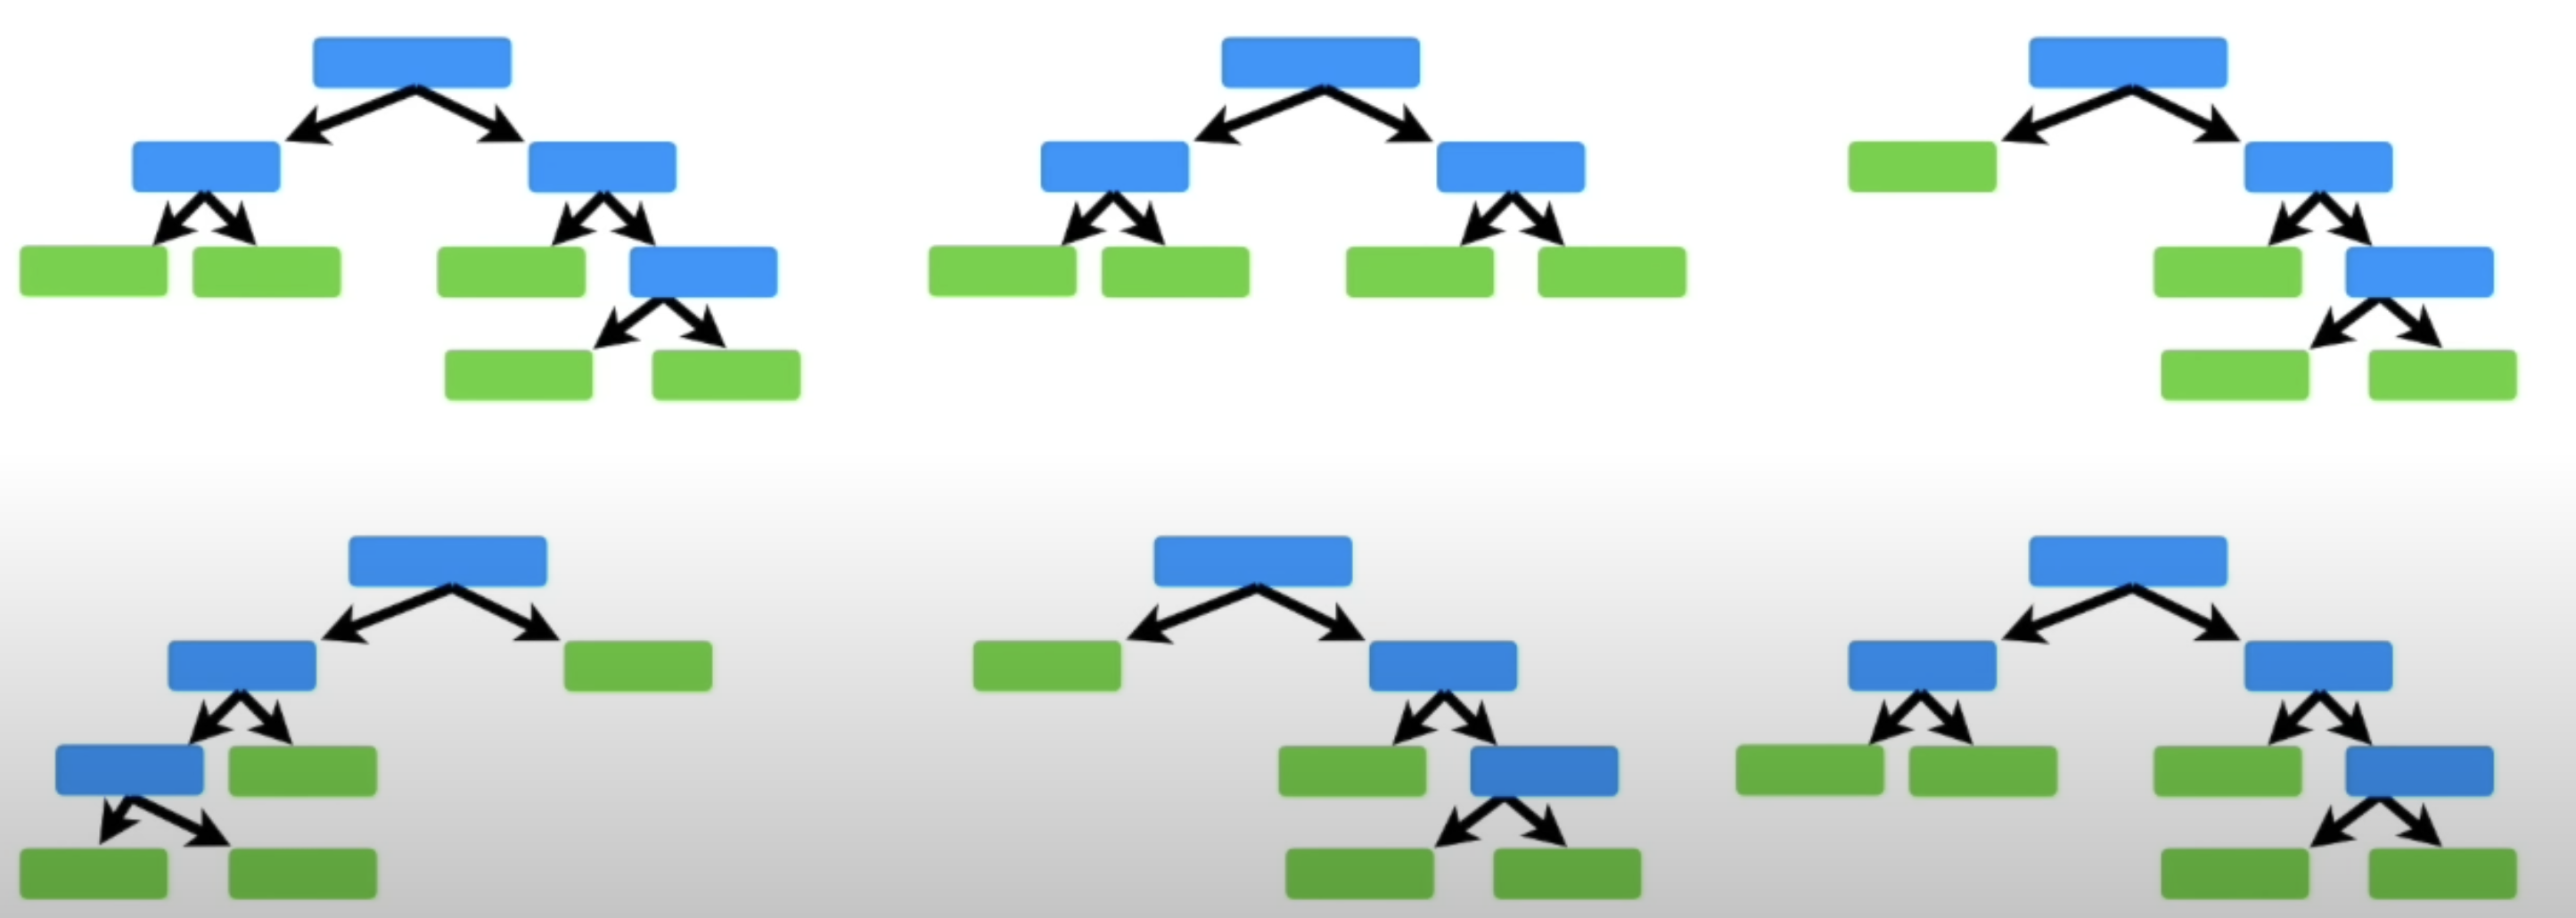

In [36]:
from PIL import Image

# Cargar la imagen
img = Image.open('./images/random_forest_1.png')


# Mostrar la imagen
img

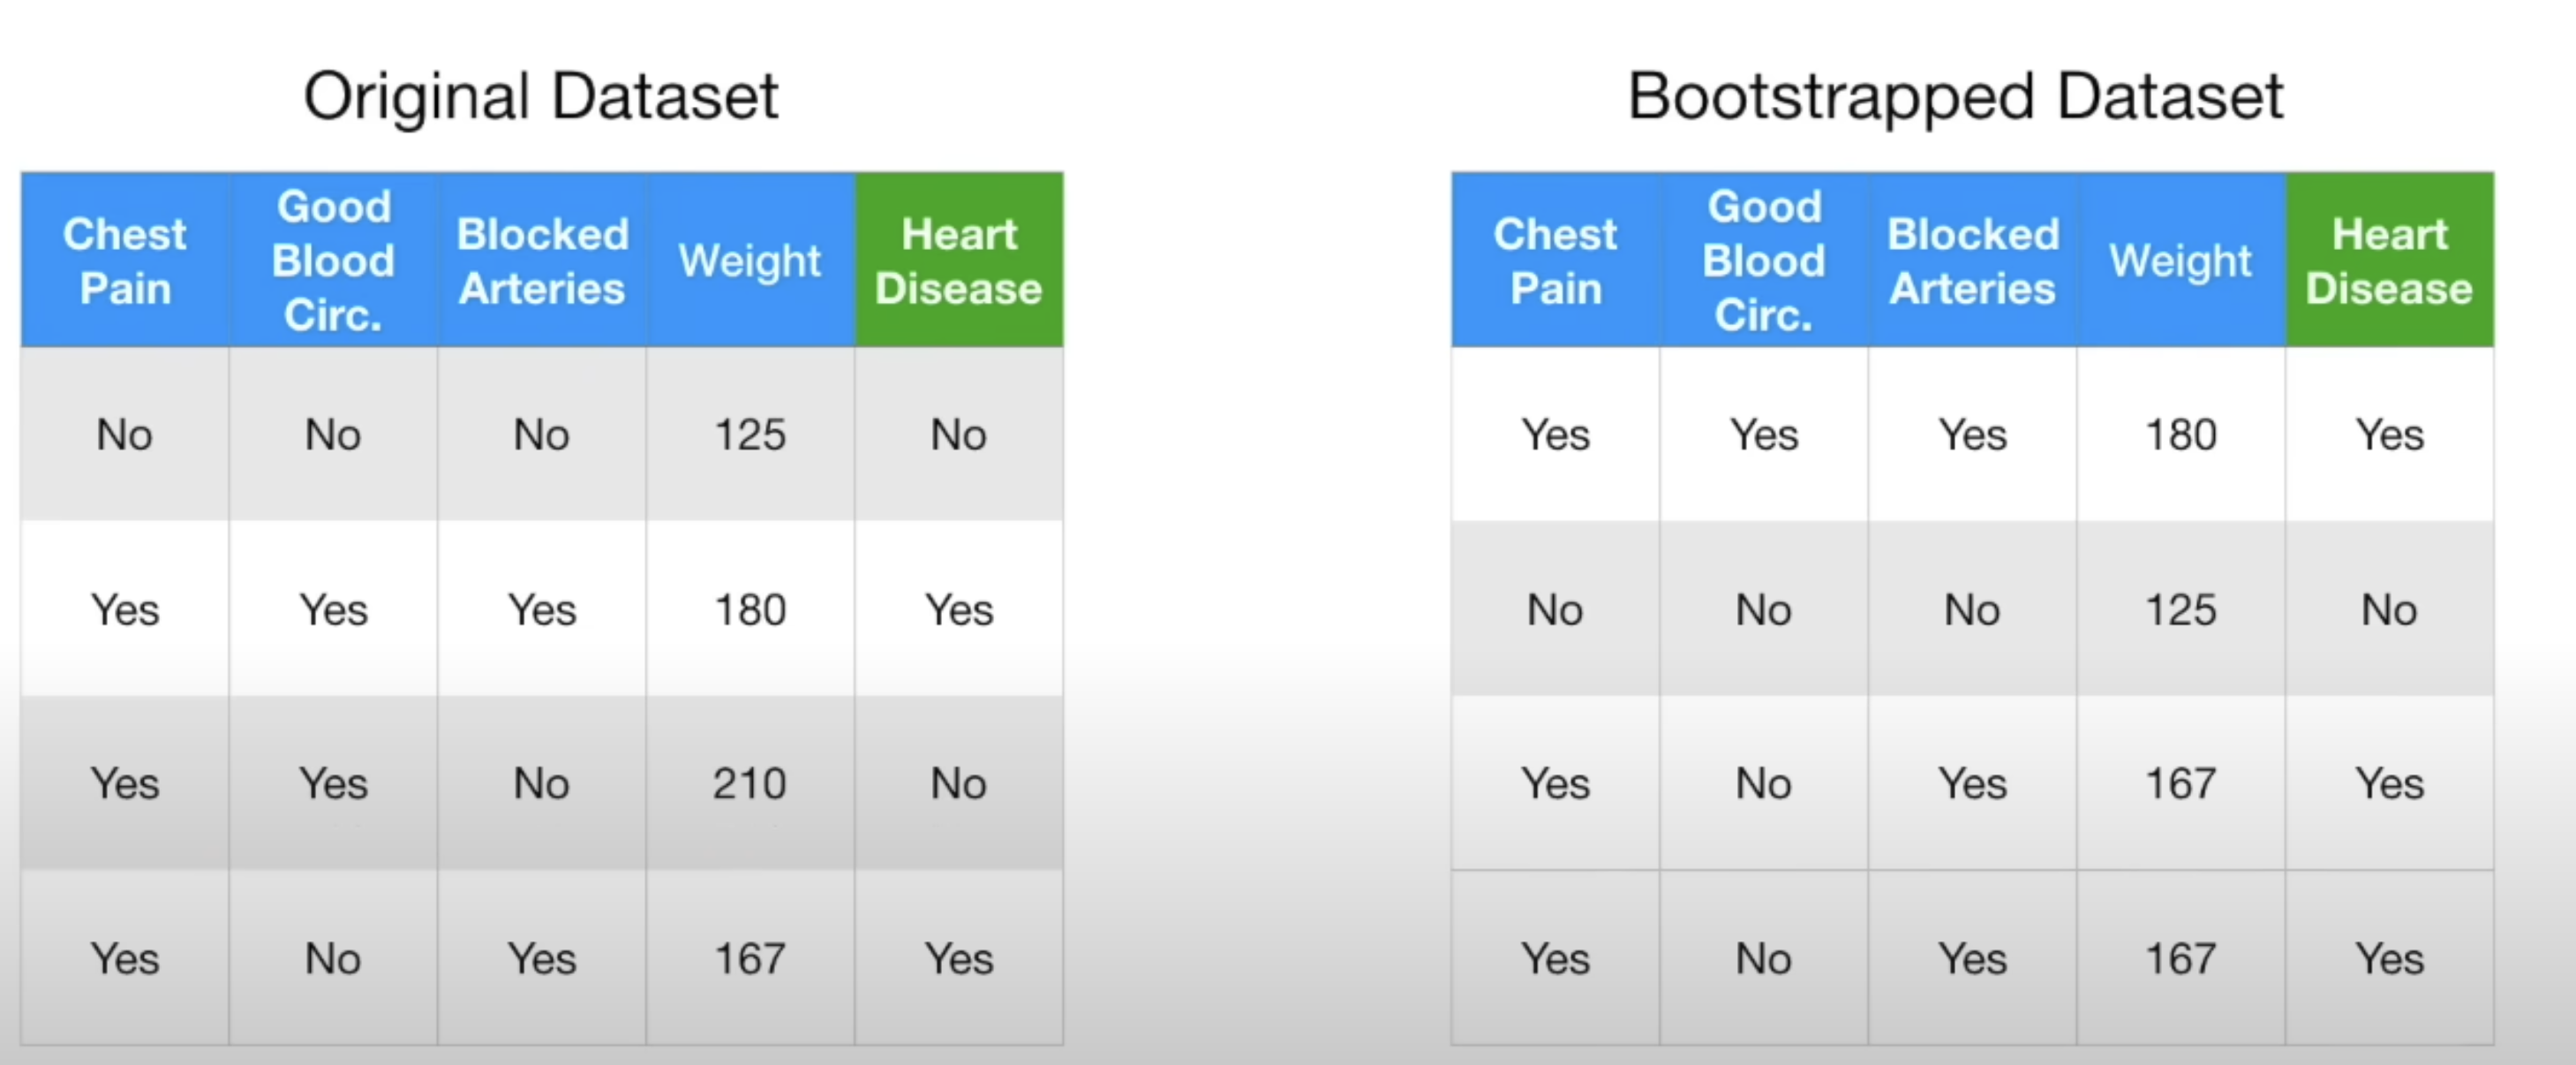

In [ ]:

img = Image.open('./images/boostrap_dataset.png')
img

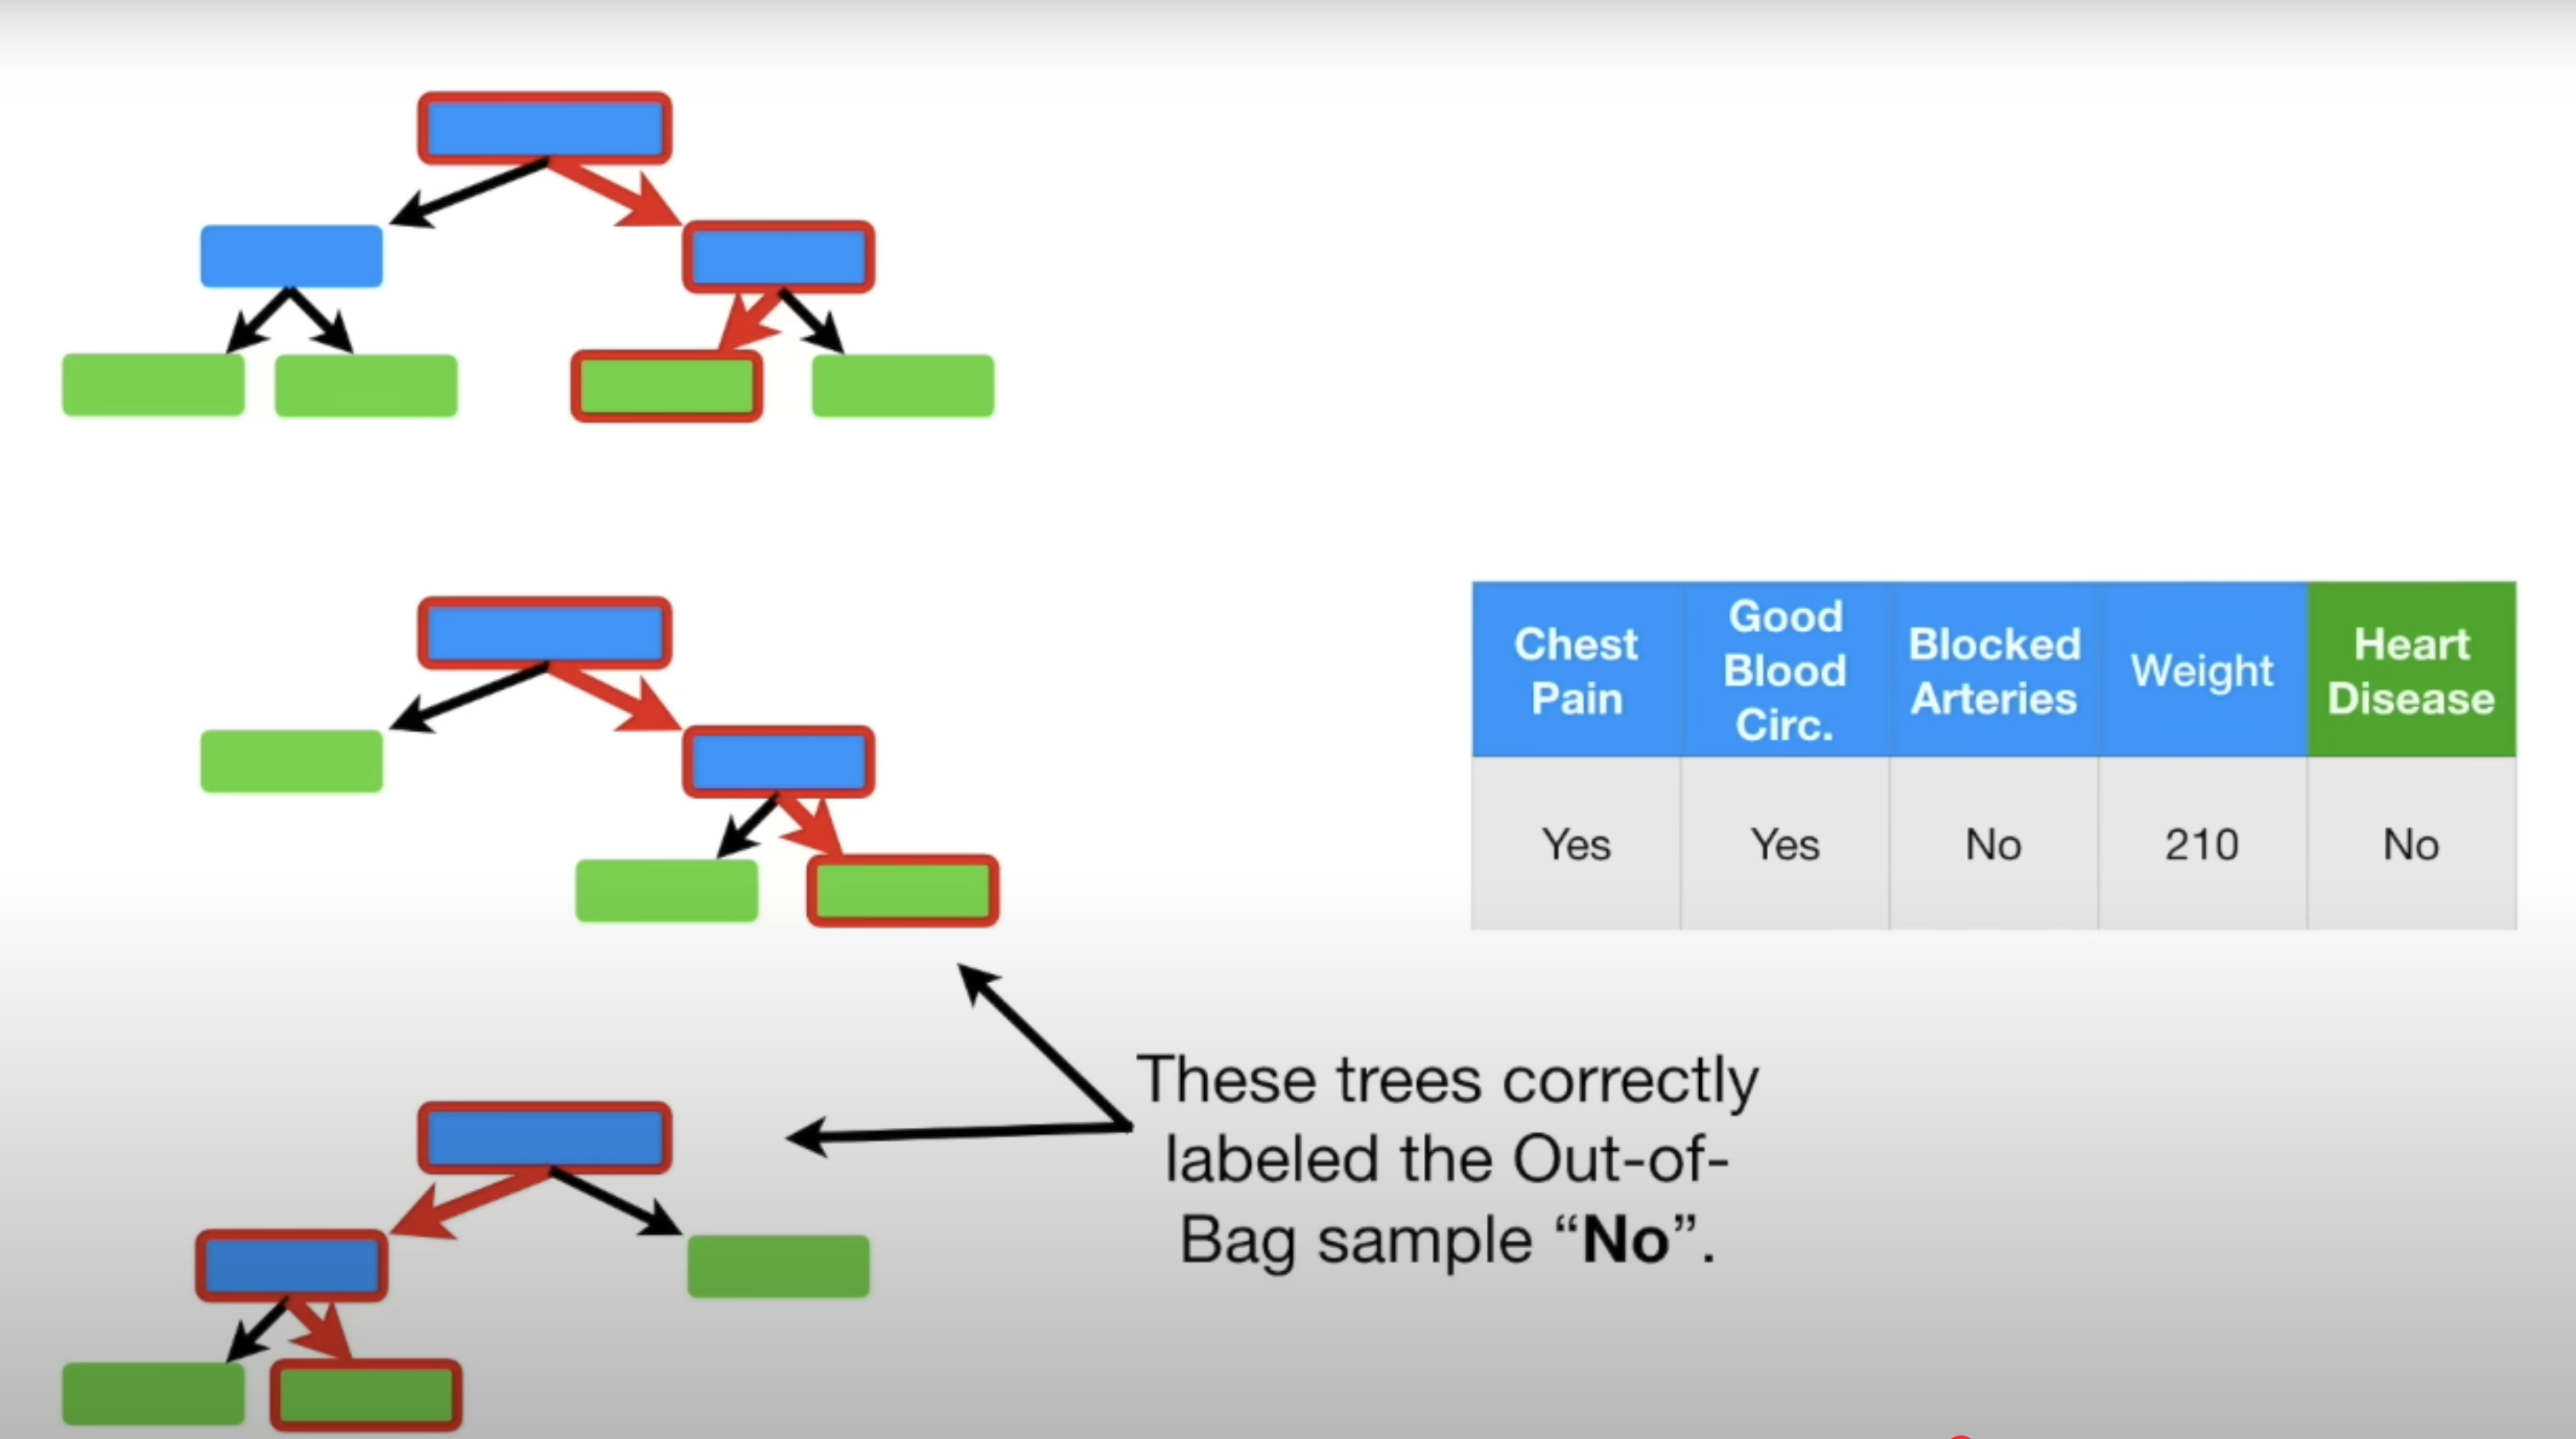

In [38]:

img = Image.open('./images/random_forest_2.png')
img

## **Bibliografía**

- Starmer, J. (2020, October 21). *StatQuest: Random Forests* [Video]. YouTube.  
  [https://youtu.be/J4Wdy0Wc_xQ](https://youtu.be/J4Wdy0Wc_xQ).  

- Imagen extraída del video *StatQuest: Random Forests*, Starmer, J. (2020, October 21). *StatQuest: Random Forests* [Video]. YouTube.


## **1. Fundamentos de Redes Neuronales**

### 1.1. ¿Qué son las redes neuronales?

Las redes neuronales artificiales están inspiradas en la forma en que funciona el cerebro. Están compuestas por **neuronas** conectadas entre sí, donde cada neurona:
- **Recibe entradas** (ej. \( x_1, x_2, x_3, \dots \))  
- Las combina de forma **ponderada** (mediante **pesos**, \( w_1, w_2, \dots \))  
- Añade un **sesgo** (\( b \)) y  
- Aplica una **función de activación** (ReLU, Sigmoide, Tanh, etc.) para producir su **salida**.

Para resolver problemas de mayor complejidad, las neuronas se organizan en **capas** (capa de entrada, capas ocultas y capa de salida). El entrenamiento usa:
- **Backpropagation** (retropropagación)  
- Un **algoritmo de optimización** (ej. Descenso por Gradiente, Adam, etc.)  
- Una **función de pérdida** (ej. Error cuadrático medio, Cross Entropy, etc.)

### 1.2. Componentes principales

1. **Pesos**: Multiplican las entradas y determinan la “influencia” de cada entrada.
2. **Sesgo**: Valor adicional que se suma a la combinación lineal.
3. **Función de activación**:  
   - **ReLU**(\( z \)) = \(\max(0, z)\)  
   - **Sigmoide**(\( z \)) = \(\frac{1}{1 + e^{-z}}\)  
   - **Tanh**(\( z \)) = \(\tanh(z)\)  
4. **Capas**:
   - **Entrada**: Recibe los datos \((x)\).
   - **Ocultas**: Procesan y transforman las representaciones.
   - **Salida**: Emite la predicción final.
5. **Función de pérdida**: Mide la diferencia entre la salida deseada y la predicha.
6. **Backpropagation**: Calcula cómo modificar cada peso para **minimizar** la función de pérdida.
7. **Optimización**: Ajusta los pesos (ej. usando Adam, SGD, etc.).

---

## **2. Ilustraciones de los componentes**

En esta sección, usaremos **Python** y **matplotlib** para **dibujar** diagramas que representen gráficamente cómo lucen:
1. **Una neurona individual** con sus entradas, pesos y sesgo.
2. **Una pequeña red neuronal** con varias neuronas en capas.


### 2.1. Ilustración de una neurona individual

El siguiente código dibuja:
- Entradas \((x_1, x_2, x_3)\)
- Pesos \((w_1, w_2, w_3)\)
- Sesgo \((b)\)
- La neurona (con su función de activación)
- Salida \((y)\)

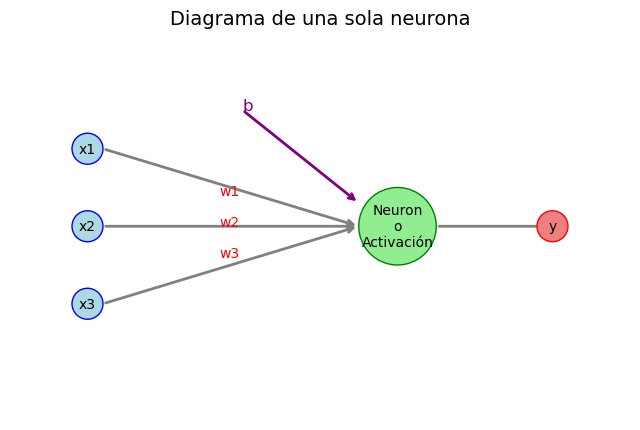

In [40]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch

def draw_single_neuron_diagram():
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim([-1, 7])
    ax.set_ylim([-1, 4])
    ax.set_aspect('equal', adjustable='box')
    
    # Ocultamos ejes para que el diagrama luzca más limpio
    ax.axis('off')
    
    # 1. Dibujamos círculos para x1, x2, x3 (entradas)
    x_positions = [0, 0, 0]
    y_positions = [2.5, 1.5, 0.5]
    input_labels = ["x1", "x2", "x3"]
    
    for (x_pos, y_pos, label) in zip(x_positions, y_positions, input_labels):
        circle = Circle((x_pos, y_pos), radius=0.2, fc='lightblue', ec='blue', zorder=2)
        ax.add_patch(circle)
        ax.text(x_pos, y_pos, label, ha='center', va='center', fontsize=10)
    
    # 2. Dibujamos la neurona en posición central
    neuron_pos = (4, 1.5)
    neuron = Circle(neuron_pos, radius=0.5, fc='lightgreen', ec='green', zorder=2)
    ax.add_patch(neuron)
    ax.text(neuron_pos[0], neuron_pos[1], "Neuron\no\nActivación",
            ha='center', va='center', fontsize=10)
    
    # 3. Conectamos cada entrada a la neurona con flechas y pesos
    weights = ["w1", "w2", "w3"]
    for i, (x_pos, y_pos, w_label) in enumerate(zip(x_positions, y_positions, weights)):
        arrow = FancyArrowPatch(
            (x_pos + 0.2, y_pos),  # Desde borde derecho del círculo de entrada
            (neuron_pos[0] - 0.5, neuron_pos[1]),  # Hasta borde izquierdo de la neurona
            arrowstyle='->', mutation_scale=10, lw=2, color='gray'
        )
        ax.add_patch(arrow)
        # Posicionar el texto del peso aproximadamente a mitad de camino
        mid_x = (x_pos + neuron_pos[0]) / 2
        mid_y = (y_pos + neuron_pos[1]) / 2
        ax.text(mid_x - 0.3, mid_y + 0.1*(i-1), w_label, fontsize=10, color='red')
    
    # 4. Agregamos el sesgo (b) en la parte superior
    bias_pos = (2, 3)
    ax.text(bias_pos[0], bias_pos[1], "b", fontsize=12, color='purple')
    arrow_bias = FancyArrowPatch(
        bias_pos,
        (neuron_pos[0] - 0.5, neuron_pos[1] + 0.3),
        arrowstyle='->', mutation_scale=10, lw=2, color='purple'
    )
    ax.add_patch(arrow_bias)
    
    # 5. Salida de la neurona
    output_pos = (6, 1.5)
    arrow_output = FancyArrowPatch(
        (neuron_pos[0] + 0.5, neuron_pos[1]),
        output_pos,
        arrowstyle='->', mutation_scale=10, lw=2, color='gray'
    )
    ax.add_patch(arrow_output)
    
    # Dibujamos un círculo para la salida
    out_circle = Circle(output_pos, radius=0.2, fc='lightcoral', ec='red', zorder=2)
    ax.add_patch(out_circle)
    ax.text(output_pos[0], output_pos[1], "y", ha='center', va='center', fontsize=10)
    
    plt.title("Diagrama de una sola neurona", fontsize=14)
    plt.show()

# Llamamos a la función para visualizar
draw_single_neuron_diagram()

# **Ejemplo: cuando la red neuronal se comporta como una regresión lineal típica**




# Cómo una Neurona hace internamente una "Regresión Lineal"

1. Recibe **valores de entrada** (estímulos).
2. Realiza una **suma ponderada** de esas entradas, usando **pesos** para cada conexión.
3. Añade un **sesgo (bias)**, que equivale a la intersección en un modelo lineal (el término que “mueve” la salida hacia arriba o abajo).
4. Opcionalmente, aplica una **función de activación** (ReLU, sigmoide, etc.).

Si **NO** hay función de activación distinta de la identidad, la salida de la neurona es:

\[
\text{Salida} = w_1 x_1 + w_2 x_2 + \ldots + w_n x_n + b
\]

**Exactamente** lo mismo que la **regresión lineal**. Por ello, se dice que internamente la neurona se **comporta** como una regresión lineal si no añadimos esa parte no lineal (activación).

## Suma Ponderada y Sesgo

- **Pesos (\( w_i \))**: escalan la importancia de cada entrada (\( x_i \)).
- **Bias (\( b \))**: permite desplazar la función sin depender exclusivamente de \( x_i \).

\[
z = \sum_{i=1}^n (w_i x_i) + b
\]

Donde \( z \) es la salida antes de aplicar activación. Cuando decimos que la función de activación es la **identidad** (\( f(z) = z \)), tenemos una regresión lineal pura.

## Diferencia con la Regresión Lineal "pura"

En redes neuronales **sí** usamos funciones de activación (ReLU, Sigmoide, Tanh, etc.) que introducen **no linealidad**:
\[
\text{Salida} = f(z) \quad \text{(con } f \text{ no lineal)}
\]
Esto hace que la red neuronal sea mucho más potente que la simple regresión lineal, pues puede aprender **patrones no lineales**. Pero, en esencia, el corazón de la neurona (la combinación lineal + sesgo) es idéntico a lo que viste en la regresión lineal.

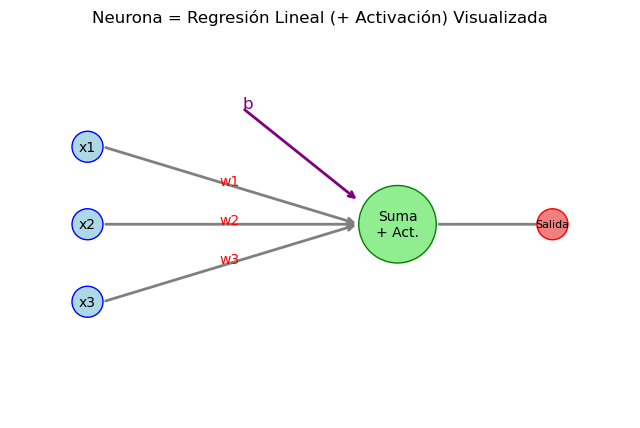

In [44]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch

def draw_single_neuron_diagram():
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim([-1, 7])
    ax.set_ylim([-1, 4])
    ax.set_aspect('equal', adjustable='box')
    
    # Ocultar ejes para mayor claridad
    ax.axis('off')
    
    # 1. Círculos para las entradas x1, x2, x3
    x_positions = [0, 0, 0]
    y_positions = [2.5, 1.5, 0.5]
    input_labels = ["x1", "x2", "x3"]
    
    for (x_pos, y_pos, label) in zip(x_positions, y_positions, input_labels):
        circle = Circle((x_pos, y_pos), radius=0.2, fc='lightblue', ec='blue', zorder=2)
        ax.add_patch(circle)
        ax.text(x_pos, y_pos, label, ha='center', va='center', fontsize=10)
    
    # 2. Neurona (suma + activación)
    neuron_pos = (4, 1.5)
    neuron = Circle(neuron_pos, radius=0.5, fc='lightgreen', ec='green', zorder=2)
    ax.add_patch(neuron)
    ax.text(neuron_pos[0], neuron_pos[1], "Suma\n+ Act.",
            ha='center', va='center', fontsize=10)
    
    # 3. Flechas con pesos
    weights = ["w1", "w2", "w3"]
    for i, (x_pos, y_pos, w_label) in enumerate(zip(x_positions, y_positions, weights)):
        arrow = FancyArrowPatch(
            (x_pos + 0.2, y_pos),
            (neuron_pos[0] - 0.5, neuron_pos[1]),
            arrowstyle='->', mutation_scale=10, lw=2, color='gray'
        )
        ax.add_patch(arrow)
        mid_x = (x_pos + neuron_pos[0]) / 2
        mid_y = (y_pos + neuron_pos[1]) / 2
        ax.text(mid_x - 0.3, mid_y, w_label, fontsize=10, color='red')
    
    # 4. Sesgo (bias)
    bias_pos = (2, 3)
    ax.text(bias_pos[0], bias_pos[1], "b", fontsize=12, color='purple')
    arrow_bias = FancyArrowPatch(
        bias_pos,
        (neuron_pos[0] - 0.5, neuron_pos[1] + 0.3),
        arrowstyle='->', mutation_scale=10, lw=2, color='purple'
    )
    ax.add_patch(arrow_bias)
    
    # 5. Salida
    output_pos = (6, 1.5)
    arrow_output = FancyArrowPatch(
        (neuron_pos[0] + 0.5, neuron_pos[1]),
        output_pos,
        arrowstyle='->', mutation_scale=10, lw=2, color='gray'
    )
    ax.add_patch(arrow_output)
    
    out_circle = Circle(output_pos, radius=0.2, fc='lightcoral', ec='red', zorder=2)
    ax.add_patch(out_circle)
    ax.text(output_pos[0], output_pos[1], "Salida", ha='center', va='center', fontsize=8)
    
    plt.title("Neurona = Regresión Lineal (+ Activación) Visualizada")
    plt.show()

# Llamamos a la función para generar la ilustración
draw_single_neuron_diagram()

# Conclusión

- **Sin** una función de activación no lineal, la **neurona** se limita a una **regresión lineal** con suma ponderada y bias.
- **Con** funciones de activación (ReLU, Sigmoide, etc.), la neurona adquiere **no linealidad**. 
- Cuando muchas neuronas se conectan en **capas** (y cada una aplica su activación), surge la posibilidad de aprender **funciones complejas** que van mucho más allá de lo lineal.

**¡Esa es la clave** de por qué los modelos de redes neuronales pueden resolver problemas que la regresión lineal pura no alcanza a modelar!

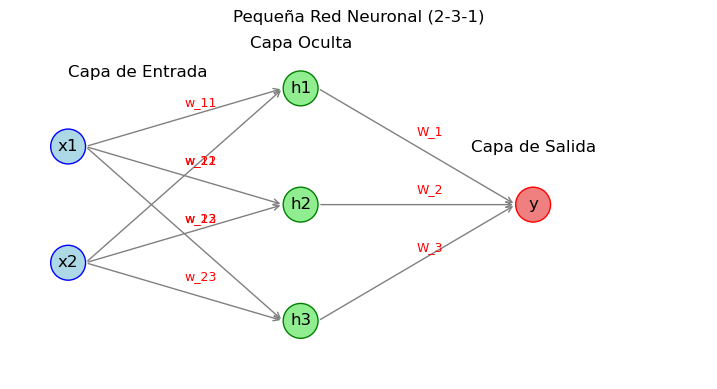

In [45]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch

def draw_small_network():
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.set_xlim([-1, 11])
    ax.set_ylim([-1, 5])
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
    
    # --- Capa de entrada (2 neuronas) ---
    input_layer_coords = [(0, 3), (0, 1)]
    for i, coord in enumerate(input_layer_coords):
        circle = Circle(coord, radius=0.3, fc='lightblue', ec='blue')
        ax.add_patch(circle)
        ax.text(coord[0], coord[1], f"x{i+1}", ha='center', va='center', fontsize=12)

    # --- Capa oculta (3 neuronas) ---
    hidden_layer_coords = [(4, 4), (4, 2), (4, 0)]
    for i, coord in enumerate(hidden_layer_coords):
        circle = Circle(coord, radius=0.3, fc='lightgreen', ec='green')
        ax.add_patch(circle)
        ax.text(coord[0], coord[1], f"h{i+1}", ha='center', va='center', fontsize=12)

    # --- Capa de salida (1 neurona) ---
    output_layer_coord = (8, 2)
    out_circle = Circle(output_layer_coord, radius=0.3, fc='lightcoral', ec='red')
    ax.add_patch(out_circle)
    ax.text(output_layer_coord[0], output_layer_coord[1], "y", ha='center', va='center', fontsize=12)
    
    # Conexiones desde capa de entrada a capa oculta
    for i, in_coord in enumerate(input_layer_coords):
        for j, hid_coord in enumerate(hidden_layer_coords):
            arrow = FancyArrowPatch(
                (in_coord[0]+0.3, in_coord[1]),
                (hid_coord[0]-0.3, hid_coord[1]),
                arrowstyle='->',
                mutation_scale=10,
                lw=1,
                color='gray'
            )
            ax.add_patch(arrow)
            # Posicionamos un posible texto de "w_ij" en la mitad
            mid_x = (in_coord[0] + hid_coord[0]) / 2
            mid_y = (in_coord[1] + hid_coord[1]) / 2
            ax.text(mid_x, mid_y+0.2, f"w_{i+1}{j+1}", fontsize=9, color='red')
    
    # Conexiones desde capa oculta a capa de salida
    for j, hid_coord in enumerate(hidden_layer_coords):
        arrow = FancyArrowPatch(
            (hid_coord[0]+0.3, hid_coord[1]),
            (output_layer_coord[0]-0.3, output_layer_coord[1]),
            arrowstyle='->',
            mutation_scale=10,
            lw=1,
            color='gray'
        )
        ax.add_patch(arrow)
        # Etiqueta para el peso
        mid_x = (hid_coord[0] + output_layer_coord[0]) / 2
        mid_y = (hid_coord[1] + output_layer_coord[1]) / 2
        ax.text(mid_x, mid_y+0.2, f"W_{j+1}", fontsize=9, color='red')
    
    # Títulos y texto
    ax.text(0, 4.2, "Capa de Entrada", fontsize=12, ha='left')
    ax.text(4, 4.7, "Capa Oculta", fontsize=12, ha='center')
    ax.text(8, 2.9, "Capa de Salida", fontsize=12, ha='center')
    
    plt.title("Pequeña Red Neuronal (2-3-1)")
    plt.show()

# Dibujamos la red
draw_small_network()

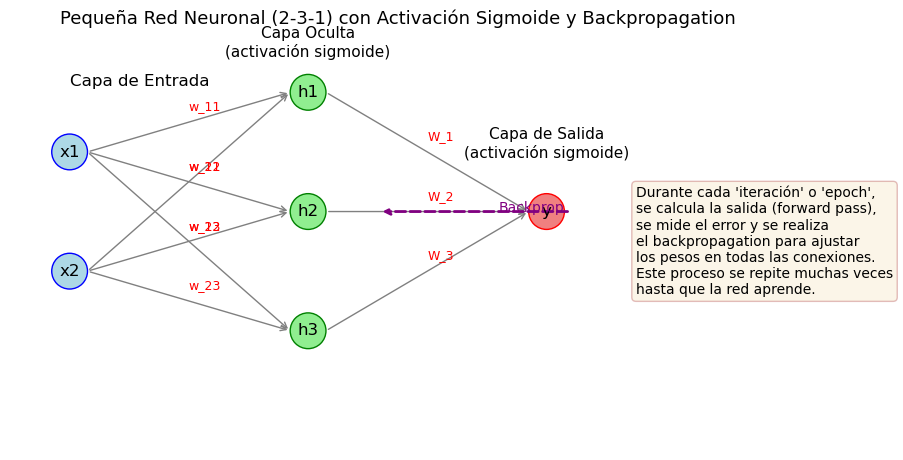

# **Red Neuronal**

En este documento encontrarás un ejemplo de cómo implementar una **red neuronal** para aprender la función XOR utilizando el **algoritmo de backpropagation** (**retropropagación** del error) de forma **manual** (sin usar librerías de alto nivel como TensorFlow o PyTorch). Verás **cada parte** del código **explicada** exhaustivamente.

---


## **2. Explicación General de la Red Neuronal**

### 2.1 Arquitectura

Nuestra red tendrá:
- **Entrada**: 2 neuronas (porque cada ejemplo es \((x_1, x_2)\)).
- **Capa Oculta**: 2 neuronas con **activación sigmoide**.
- **Capa de Salida**: 1 neurona (también con **activación sigmoide**).


### 2.2. Pesos y Sesgos

- Llamaremos **w1** (matriz de pesos) y **b1** (bias) a los **parámetros** de la capa oculta.  
- Llamaremos **w2** y **b2** a los de la capa de salida.


### 2.4. Función de Costo

Usaremos **Error Cuadrático Medio (MSE)**:

\[
\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2
\]

donde \(\hat{y} = a2\) es la predicción, \(y\) es el valor real, y \(m\) es el número de ejemplos.

### 2.5. Backpropagation

- Calculamos la derivada de \(\text{MSE}\) respecto a cada **parámetro** (\(w1, b1, w2, b2\)) usando la **regla de la cadena**.
- Después **ajustamos** cada parámetro con:
  \[
  \theta \leftarrow \theta - \eta \frac{\partial \text{MSE}}{\partial \theta}
  \]
  donde \(\eta\) es la **tasa de aprendizaje** (*learning rate*).

### 2.6. Épocas (epochs)

Un **epoch** es **una pasada completa** sobre todos los datos de entrenamiento. 

---

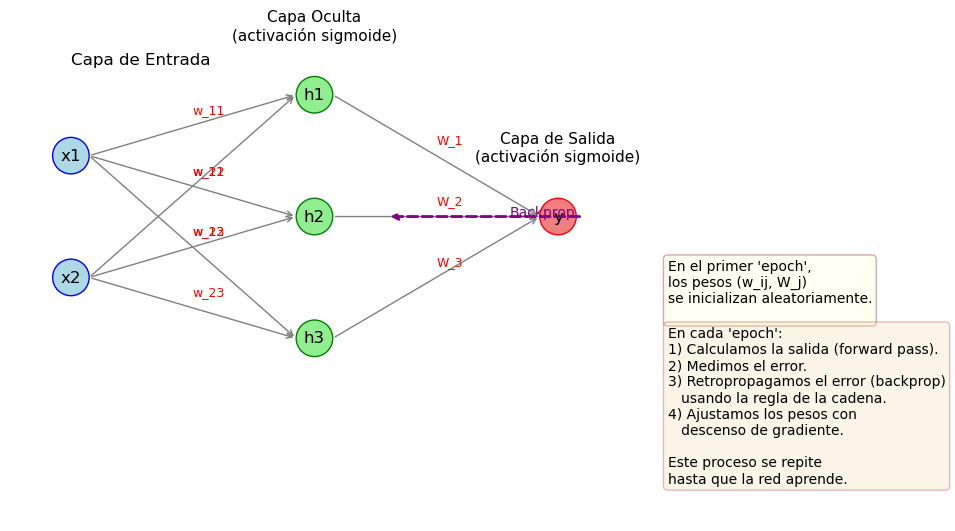

In [57]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch

def draw_small_network_sigmoid_backprop():
    """
    Dibuja una red neuronal (2-3-1) y muestra de forma ilustrativa:
    - Capa de entrada con 2 neuronas (x1, x2).
    - Capa oculta con 3 neuronas (h1, h2, h3) con activación sigmoide.
    - Capa de salida con 1 neurona (y) también usando sigmoide.
    - Conexiones entre capas con pesos.
    - Explicación de cómo en el primer epoch se inicializan pesos aleatorios,
      y luego se aplican forward pass, cálculo del error, backpropagation
      (regla de la cadena) y optimización con descenso de gradiente, 
      a lo largo de múltiples epochs.
    """
    
    fig, ax = plt.subplots(figsize=(11, 7))
    ax.set_xlim([-1, 13])
    ax.set_ylim([-1, 7])
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
    
    # --- Capa de entrada (2 neuronas) ---
    input_layer_coords = [(0, 5), (0, 3)]
    for i, coord in enumerate(input_layer_coords):
        circle = Circle(coord, radius=0.3, fc='lightblue', ec='blue')
        ax.add_patch(circle)
        ax.text(coord[0], coord[1], f"x{i+1}", ha='center', va='center', fontsize=12)
    
    # --- Capa oculta (3 neuronas) ---
    hidden_layer_coords = [(4, 6), (4, 4), (4, 2)]
    for i, coord in enumerate(hidden_layer_coords):
        circle = Circle(coord, radius=0.3, fc='lightgreen', ec='green')
        ax.add_patch(circle)
        ax.text(coord[0], coord[1], f"h{i+1}", ha='center', va='center', fontsize=12)
    
    # --- Capa de salida (1 neurona) ---
    output_layer_coord = (8, 4)
    out_circle = Circle(output_layer_coord, radius=0.3, fc='lightcoral', ec='red')
    ax.add_patch(out_circle)
    ax.text(output_layer_coord[0], output_layer_coord[1], "y", ha='center', va='center', fontsize=12)
    
    # Conexiones desde capa de entrada a capa oculta
    for i, in_coord in enumerate(input_layer_coords):
        for j, hid_coord in enumerate(hidden_layer_coords):
            arrow = FancyArrowPatch(
                (in_coord[0] + 0.3, in_coord[1]),
                (hid_coord[0] - 0.3, hid_coord[1]),
                arrowstyle='->',
                mutation_scale=10,
                lw=1,
                color='gray'
            )
            ax.add_patch(arrow)
            # Etiqueta w_ij en el camino
            mid_x = (in_coord[0] + hid_coord[0]) / 2
            mid_y = (in_coord[1] + hid_coord[1]) / 2
            ax.text(mid_x, mid_y + 0.2, f"w_{i+1}{j+1}", fontsize=9, color='red')
    
    # Conexiones desde capa oculta a capa de salida
    for j, hid_coord in enumerate(hidden_layer_coords):
        arrow = FancyArrowPatch(
            (hid_coord[0] + 0.3, hid_coord[1]),
            (output_layer_coord[0] - 0.3, output_layer_coord[1]),
            arrowstyle='->',
            mutation_scale=10,
            lw=1,
            color='gray'
        )
        ax.add_patch(arrow)
        mid_x = (hid_coord[0] + output_layer_coord[0]) / 2
        mid_y = (hid_coord[1] + output_layer_coord[1]) / 2
        ax.text(mid_x, mid_y + 0.2, f"W_{j+1}", fontsize=9, color='red')
    
    # Títulos de capas
    ax.text(0, 6.5, "Capa de Entrada", fontsize=12, ha='left')
    ax.text(4, 6.9, "Capa Oculta\n(activación sigmoide)", fontsize=11, ha='center')
    ax.text(8, 4.9, "Capa de Salida\n(activación sigmoide)", fontsize=11, ha='center')
    
    # Texto adicional sobre inicialización aleatoria
    ax.text(9.8, 3.3, 
            "En el primer 'epoch',\n"
            "los pesos (w_ij, W_j)\n"
            "se inicializan aleatoriamente.\n",
            fontsize=10, va='top', ha='left',
            bbox=dict(boxstyle="round", fc="lightyellow", ec="brown", alpha=0.4))
    
    # Texto sobre forward pass, backprop y epochs
    ax.text(9.8, 2.2, 
            "En cada 'epoch':\n"
            "1) Calculamos la salida (forward pass).\n"
            "2) Medimos el error.\n"
            "3) Retropropagamos el error (backprop)\n"
            "   usando la regla de la cadena.\n"
            "4) Ajustamos los pesos con\n"
            "   descenso de gradiente.\n"
            "\nEste proceso se repite\n"
            "hasta que la red aprende.",
            fontsize=10, va='top', ha='left',
            bbox=dict(boxstyle="round", fc="wheat", ec="brown", alpha=0.3))
    
    # Flecha conceptual que muestra la retropropagación
    backprop_arrow = FancyArrowPatch(
        (output_layer_coord[0] + 0.4, output_layer_coord[1]),
        (hidden_layer_coords[1][0] + 1.2, hidden_layer_coords[1][1]),
        arrowstyle='->',
        mutation_scale=10,
        lw=2,
        color='purple',
        linestyle='--'
    )
    ax.add_patch(backprop_arrow)
    ax.text((output_layer_coord[0] + hidden_layer_coords[1][0]) / 2 + 1.2,
            (output_layer_coord[1] + hidden_layer_coords[1][1]) / 2,
            "Backprop", fontsize=10, color='purple')
    
    plt.title("", fontsize=13)
    plt.show()


# Ejecutar la función para visualizar la red
draw_small_network_sigmoid_backprop()

In [47]:
# Fijamos semilla para reproducibilidad
np.random.seed(42)

# w1: pesos capa oculta, forma (2, 2) -> 2 entradas x 2 neuronas ocultas
w1 = np.random.randn(2, 2)
# b1: bias capa oculta, forma (1, 2)
b1 = np.random.randn(1, 2)

# w2: pesos capa salida, forma (2, 1) -> 2 neuronas ocultas x 1 neurona salida
w2 = np.random.randn(2, 1)
# b2: bias capa salida, forma (1, 1)
b2 = np.random.randn(1, 1)

# Función de activación sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivada de la sigmoide
def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [48]:
def forward_pass(X, w1, b1, w2, b2):
    """
    X: (batch_size, 2)
    w1: (2, 2), b1: (1, 2)
    w2: (2, 1), b2: (1, 1)
    """
    # Capa oculta
    z1 = np.dot(X, w1) + b1  # (batch_size, 2)
    a1 = sigmoid(z1)         # Activación capa oculta
    # Capa de salida
    z2 = np.dot(a1, w2) + b2 # (batch_size, 1)
    a2 = sigmoid(z2)         # Activación capa salida
    return z1, a1, z2, a2

In [49]:
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [50]:
def backprop(X, y, w1, b1, w2, b2, eta=0.1):
    """
    Un paso de backpropagation + actualización.
    
    eta: tasa de aprendizaje
    Retorna los parámetros actualizados (w1, b1, w2, b2).
    """
    # 1) Forward pass
    z1, a1, z2, a2 = forward_pass(X, w1, b1, w2, b2)
    
    # Número de ejemplos
    m = X.shape[0]
    
    # 2) Cálculo del error (MSE)
    loss = mse_loss(y, a2)
    
    # 3) Backprop:
    # dLoss/da2 = 2 * (a2 - y) / m   (derivada MSE wrt la predicción)
    dL_da2 = 2 * (a2 - y) / m
    
    # dLoss/dz2 = dLoss/da2 * da2/dz2 = dLoss/da2 * sig'(z2)
    dL_dz2 = dL_da2 * sigmoid_prime(z2)  # shape (batch_size, 1)
    
    # Gradientes para capa de salida:
    # dLoss/dw2 = a1^T * dL_dz2
    dL_dw2 = np.dot(a1.T, dL_dz2)        # shape (2, 1)
    # dLoss/db2 = sum(dL_dz2) a lo largo del batch
    dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)  # shape (1, 1)
    
    # Retropropagar a la capa oculta:
    # dL_da1 = dL_dz2 * w2^T
    dL_da1 = np.dot(dL_dz2, w2.T)        # shape (batch_size, 2)
    # dL_dz1 = dL_da1 * sig'(z1)
    dL_dz1 = dL_da1 * sigmoid_prime(z1)  # shape (batch_size, 2)
    
    # Gradientes para capa oculta:
    # dL_dw1 = X^T * dL_dz1
    dL_dw1 = np.dot(X.T, dL_dz1)         # shape (2, 2)
    # dL_db1 = sum(dL_dz1)
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)  # shape (1, 2)
    
    # 4) Actualizar parámetros con Gradiente Descendente
    w2 -= eta * dL_dw2
    b2 -= eta * dL_db2
    w1 -= eta * dL_dw1
    b1 -= eta * dL_db1
    
    return w1, b1, w2, b2, loss

In [51]:
epochs = 20000
eta = 0.1  # learning rate

loss_history = []

for epoch in range(epochs):
    w1, b1, w2, b2, loss = backprop(X, y, w1, b1, w2, b2, eta)
    loss_history.append(loss)
    
    # Podemos imprimir cada cierto número de épocas
    if epoch % 2000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Mostrar el último valor de loss
print(f"Final Loss: {loss_history[-1]:.4f}")

Epoch 0, Loss: 0.2944
Epoch 2000, Loss: 0.2444
Epoch 4000, Loss: 0.2035
Epoch 6000, Loss: 0.1533
Epoch 8000, Loss: 0.0463
Epoch 10000, Loss: 0.0156
Epoch 12000, Loss: 0.0084
Epoch 14000, Loss: 0.0056
Epoch 16000, Loss: 0.0041
Epoch 18000, Loss: 0.0033
Final Loss: 0.0027


In [52]:
_, _, _, a2 = forward_pass(X, w1, b1, w2, b2)
predicciones = (a2 > 0.5).astype(int)

print("Predicciones:\n", predicciones.ravel())
print("Valores reales:\n", y.ravel())

Predicciones:
 [0 1 1 0]
Valores reales:
 [0 1 1 0]


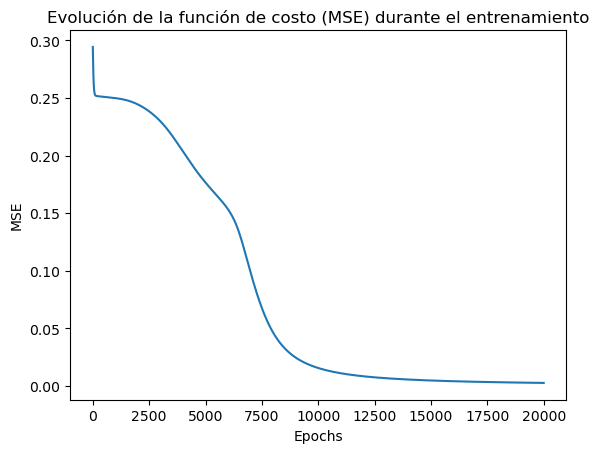

In [54]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.title("Evolución de la función de costo (MSE) durante el entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()